<a href="https://colab.research.google.com/github/PDBeurope/afdb-notebooks/blob/main/afdb-AM-plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot AlphaMissense data from the AlphaFold Database <a name="INSTRUCTIONS"></a>

This  notebook provides a tool for visualising AlphaMissense predictions from the AlphaFold Database. Here, you can replicate the heatmap visualisation commonly used for AlphaMissense data.

---

AlphaMissense was used to classify the effects of all possible 216 million single amino acid sequence substitutions across the 19,233 canonical human proteins.

For more information about AlphaMissense, please refer to the [paper](https://doi.org/10.1126/science.adg7492).

If you make use of an AlphaFold prediction from the AlphaFold Database, please cite the following papers:
- [Jumper, J et al. Highly accurate protein structure prediction with AlphaFold. Nature (2021)](https://doi.org/10.1038/s41586-021-03819-2)
- [Varadi, M et al. AlphaFold Protein Structure Database in 2024: providing structure coverage for over 214 million protein sequences. Nucleic Acids Research (2024)](https://doi.org/10.1093/nar/gkad1011)

If you use data from AlphaMissense in your work, please cite the following paper:
- [Cheng, J et al. Accurate proteome-wide missense variant effect prediction with AlphaMissense. Science (2023)](https://doi.org/10.1126/science.adg7492)

## Instructions <a name="INSTRUCTIONS"></a>

* Quick Start <a name="Quick Start"></a>

In order to make the learning experience more accessible and interactive, we have incorporated widgets that allow you to provide inputs and customise certain aspects of the code.

* How to use Google Colab <a name="How to use Google Colab"></a>

1. Before running the code, make sure you have filled the necessary fields.
2. To run a code cell, click on the cell to select it. You will notice a play button (▶️) on the left side of the cell. Click on the play button or press Shift+Enter to run the code in the selected cell.<br>
The code will start executing, and you will see the output, if any, displayed below the code cell.
3. Move to the next code cell and repeat steps 2 and 3 until you have executed all the desired code cells in sequence.<br>
The currently running step is indicated by a circle with a stop sign next to it. If you need to stop or interrupt the execution of a code cell, you can click on the stop button (■) located next to the play button.<br>
Remember to run the code cells in the correct order, as their execution might depend on variables or functions defined in previous cells. You can modify the code in a code cell and re-run it to see updated results.

Note: If the notebook runtime is restarted you will need to re-run

In [3]:
#@title Retrieve AlphaMissense data from the AlphaFold Database
#@markdown Here you can retrieve the AlphaMissense data for a particular entry from the AlphaFold Database
import requests
from google.colab import files
import pandas as pd
import io

UniProt_accession = "Q5VSL9" #@param {type:"string"}
#@markdown Remember that AlphaMissense data is only available across the 19,233 canonical human proteins.
UniProt_accession = UniProt_accession.strip()


filename = f"{UniProt_accession}-aa-substitutions.csv"

def get_protein(UniProt_accession):
  api_endpoint = "https://alphafold.ebi.ac.uk/api/prediction/"
  url = f"{api_endpoint}{UniProt_accession}"  # Construct the URL for API

  response = requests.get(url)
  if response.status_code == 200:
    result = response.json()
    return result
  else:
      print ( "Error, check UniProt Accession")

protein = get_protein(UniProt_accession)
if protein:
    am_url = protein[0].get('amAnnotationsUrl')
    if am_url:
        print(am_url)

        # Use wget to download the CSV file from the URL
        !wget {am_url} -O {filename}  # -O option specifies the output filename
    else:
        print("No 'amAnnotationsUrl' found")
else:
    print("Failed to retrieve protein data")

#@title Load file
#@markdown First run this code to upload your csv file to plot the AlphaMissense pathogenicity


AM = pd.read_csv(filename)

def process_data(df):
  """
  This function takes a pandas dataframe with a 'protein_variant' column
  and adds two new columns: 'reference residue' and 'alternative amino acids'
  by extracting data from the 'protein_variant' column using regex.
  """
  df["reference_aa"] = df["protein_variant"].str.extract('^([A-Z])')
  df["residue_number"] = df["protein_variant"].str[1:-1]
  df["alternative_aa"] = df["protein_variant"].str.extract('([A-Z])$')
  return df

df = process_data(AM)
df['residue_number'] = df['residue_number'].astype(int)

https://alphafold.ebi.ac.uk/files/AF-Q5VSL9-F1-aa-substitutions.csv
--2024-05-24 11:20:13--  https://alphafold.ebi.ac.uk/files/AF-Q5VSL9-F1-aa-substitutions.csv
Resolving alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)... 34.149.152.8
Connecting to alphafold.ebi.ac.uk (alphafold.ebi.ac.uk)|34.149.152.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 307449 (300K) [text/csv]
Saving to: ‘Q5VSL9-aa-substitutions.csv’

Q5VSL9-aa-substitut 100%[===================>] 300.24K   527KB/s    in 0.6s    

2024-05-24 11:20:14 (527 KB/s) - ‘Q5VSL9-aa-substitutions.csv’ saved [307449/307449]



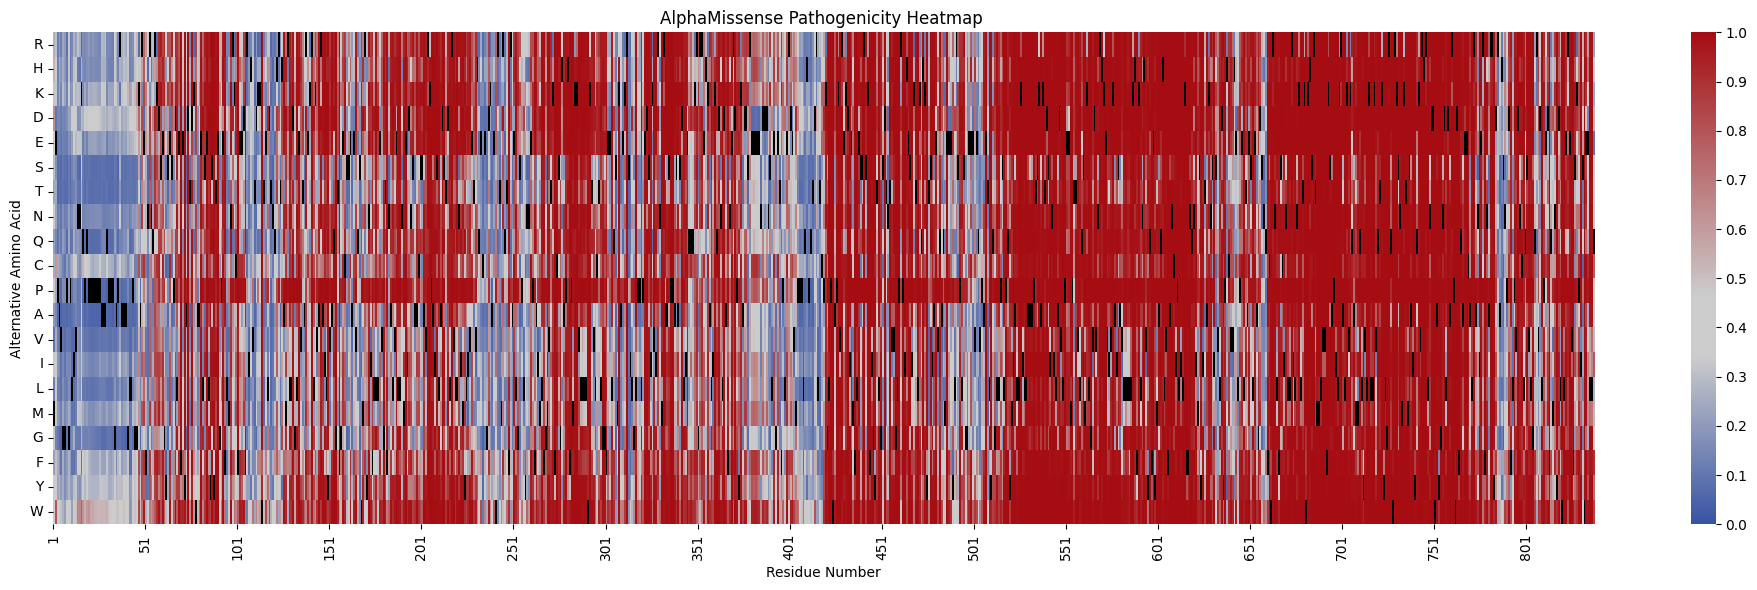

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
#@title Plot and download
#@markdown This code will plot the data for the UniProt accession provided and will downaload it as a png file to your local computer
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from google.colab import files

df['ref_residue'] = df['reference_aa'] + df['residue_number'].astype(str)
pivot_table = df.pivot_table(values='am_pathogenicity', index='alternative_aa', columns='ref_residue', aggfunc='mean')

#custom palette
def create_custom_colormap():
    cdict = {
        'red': [
            (0.0, 56/255, 56/255),
            (0.34, 204/255, 204/255),
            (0.464, 204/255, 204/255),
            (1.0, 165/255, 165/255)
        ],
        'green': [
            (0.0, 83/255, 83/255),
            (0.34, 204/255, 204/255),
            (0.464, 204/255, 204/255),
            (1.0, 13/255, 13/255)
        ],
        'blue': [
            (0.0, 163/255, 163/255),
            (0.34, 204/255, 204/255),
            (0.464, 204/255, 204/255),
            (1.0, 18/255, 18/255)
        ]
    }
    return LinearSegmentedColormap('CustomMap', segmentdata=cdict)

# custom colormap
custom_cmap = create_custom_colormap()

# pivot table
pivot_table = pd.pivot_table(df, values='am_pathogenicity',
                             index='alternative_aa', columns='residue_number')

custom_order = ["R", "H", "K", "D", "E", "S", "T", "N", "Q",  "C", "P", "A", "V", "I", "L", "M", "G", "F","Y","W"]

# Reindex the pivot table
pivot_table = pivot_table.reindex(custom_order)

plt.figure(figsize=(20, 6))

ax = sns.heatmap(pivot_table, cmap=custom_cmap, vmin=0, vmax=1)  # Limits for the color scale

ax.set_xlabel('Residue Number')
ax.set_ylabel('Alternative Amino Acid')
plt.title('AlphaMissense Pathogenicity Heatmap ')

xticks = range(0, pivot_table.shape[1], 50)
ax.set_xticks(xticks)
ax.set_xticklabels(pivot_table.columns[xticks])
ax.set_facecolor('black') #Set background black for matching AA
plt.yticks(rotation = 0)

cbar = ax.collections[0].colorbar
cbar.set_ticks([i / 10.0 for i in range(11)])
cbar.set_ticklabels([f'{i / 10.0:.1f}' for i in range(11)])
plt.tight_layout()

# Save the plot to a file
file_name_all = f'pathogenicity_heatmap{filename}.png'
plt.savefig(file_name_all)
plt.show()
plt.close()
files.download(file_name_all)

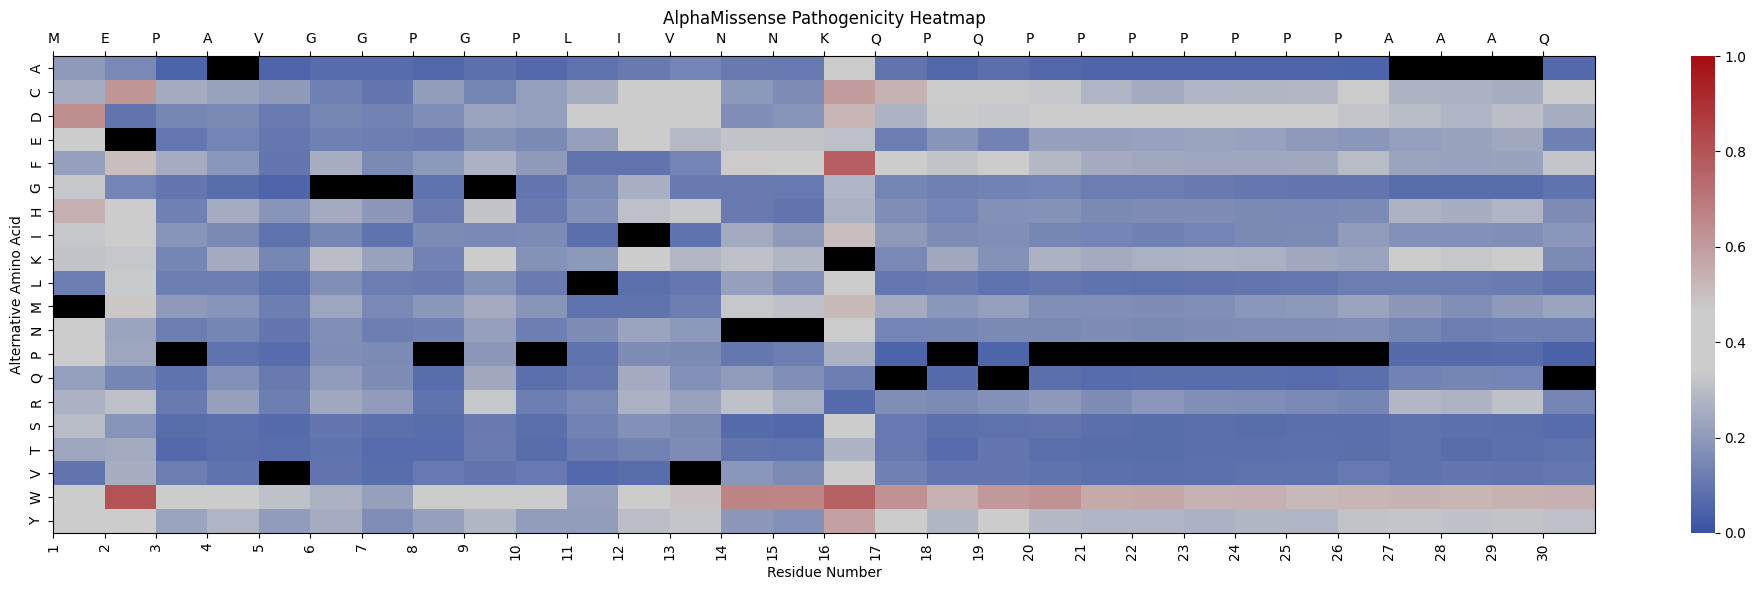

In [ ]:
#@title Zoom in
#@markdown Here you can zoom in to the regions you wish

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd

#@markdown Define the limits for the regions you would like to zoom in on the AlphaMissense pathogenicity heatmap
number_minimum = 1 # @param {type:"integer"}
number_maximum = 30 # @param {type:"integer"}

# Assuming df is your DataFrame and create_custom_colormap is defined
# Assuming df is your DataFrame and create_custom_colormap is defined

# Combine reference_aa and residue_number into a single column for a multi-index
df['ref_residue'] = df['reference_aa'] + df['residue_number'].astype(str)

# Pivot the table for heatmap visualization
pivot_table = df.pivot_table(values='am_pathogenicity', index='alternative_aa', columns='residue_number', aggfunc='mean')

# Custom colormap definition
custom_cmap = create_custom_colormap()

# Plot heatmap
fig, ax1 = plt.subplots(figsize=(20, 6))
sns.heatmap(pivot_table, cmap=custom_cmap, ax=ax1, vmin=0, vmax=1)

ax1.set_xlabel('Residue Number')
ax1.set_ylabel('Alternative Amino Acid')
ax1.set_title("AlphaMissense Pathogenicity Heatmap")

ax1.set_xlim(number_minimum - 1, number_maximum )

ax1.set_xticks(range(number_minimum - 1, number_maximum))
ax1.set_xticklabels(range(number_minimum, number_maximum + 1), ha="center")

# Setting up secondary x-axis
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
ax1.set_facecolor('black')

# Extracting reference amino acids for secondary axis
ref_aas = df[df['residue_number'].isin(range(number_minimum, number_maximum + 1))].drop_duplicates(subset=['residue_number'])[['residue_number', 'reference_aa']]
ref_aas.set_index('residue_number', inplace=True)
ref_aas = ref_aas.loc[range(number_minimum, number_maximum + 1)]  # Indexing adjusted

# Set tick positions and labels for ax2
ax2.set_xticks(range(number_minimum - 1, number_maximum))
ax2.set_xticklabels(ref_aas['reference_aa'], ha="center")  # Centered labels

file_name = f'pathogenicity_heatmap{filename}{number_minimum}{number_maximum}.png'
plt.tight_layout()
plt.savefig(file_name)
plt.show()

In [ ]:
#@title Download zoomed-in plot
#@markdown Run this code to download the previous plot
plt.close()
files.download(file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Contact us

If you experience any bugs please contact afdbhelp@ebi.ac.uk

---